In [1]:
import scipy.optimize as opt
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
import sys

In [2]:
def super_gaussian(params, amplitude, xo, yo, sigma, exponent):
    exponent = 0.0001*exponent
    xo = float(xo)
    yo = float(yo)
    r = np.sqrt((params[0] - xo)**2 + (params[1] - yo)**2)
    g = amplitude * np.exp(-(r/sigma)**exponent)
    return g.ravel()

In [3]:
dir_name = '../../rslaser/package_data/'
img_name = 'raw_beam_profile_532nm_pump.bmp'

In [4]:
img = Image.open(dir_name + img_name)
img_orig = np.array(img)

x = np.linspace(0, img_orig.shape[1] - 1, img_orig.shape[1])
y = np.linspace(0, img_orig.shape[0] - 1, img_orig.shape[0])
x, y = np.meshgrid(x, y)

initial_guess = (3, 300, 300, 10, 2)
popt, pcov = opt.curve_fit(super_gaussian, (x, y), img_orig.flatten(), p0=initial_guess, maxfev=10000)
img_fit = super_gaussian((x, y), *popt).reshape(img_orig.shape)

/home/vagrant/.pyenv/versions/py3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in power
  


In [27]:
_max = popt[0]
_rx = popt[1]
_ry = popt[2]
_sig = popt[3]
_exp = popt[4] * 1.e-4
print('_max = ', _max)
print('_sig = ', _sig)
print('_exp = ', _exp)

_max =  166.3479728708368
_sig =  176.0251651636383
_exp =  1.6669644845887897


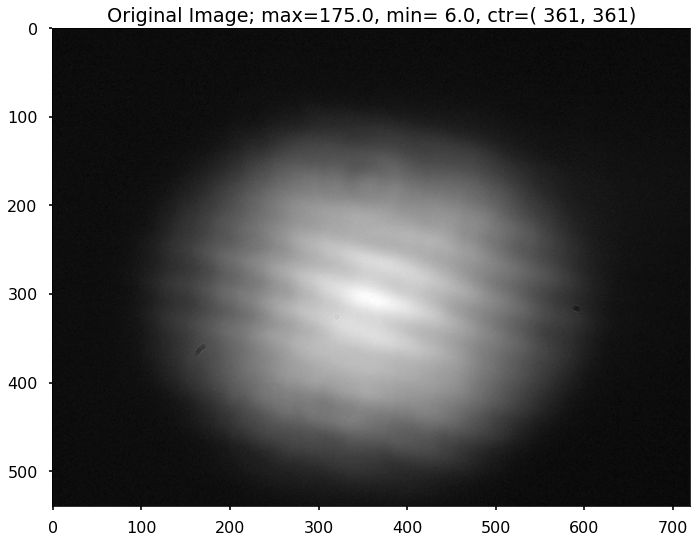

In [30]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
#    ax.imshow(img_orig, cmap='gray', vmin=0, vmax=255)
    ax.imshow(img_orig, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Original Image; max={0:4.1f}'.format(np.max(img_orig))+', min={0:4.1f}'.format(np.min(img_orig))+', ctr=({0:4.0f},{0:4.0f})'.format(_rx,_ry))

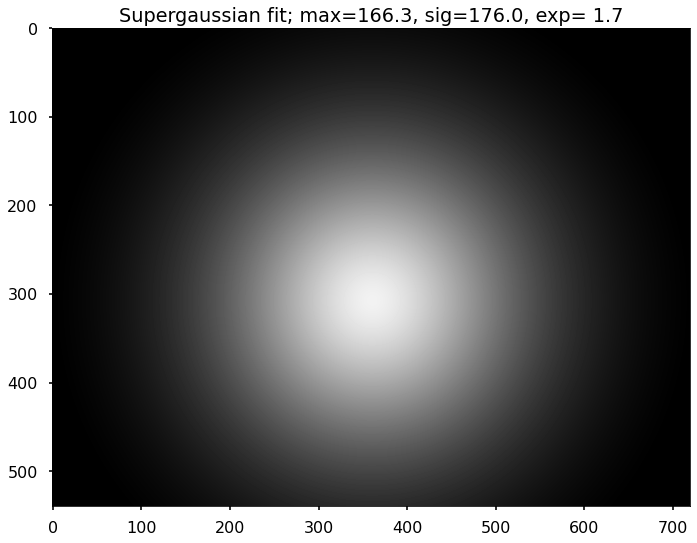

In [23]:
# plot twoD_Gaussian data generated above
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_fit, cmap='gray', vmin=np.min(img_orig), vmax=np.max(img_orig))
    ax.set_title('Supergaussian fit; max={0:4.1f}, '.format(_max)+'sig={0:4.1f}, '.format(_sig)+'exp={0:4.1f}'.format(_exp))

min_diff =  -22.47814325099892
max_diff =  19.90542779994442
relative deviation (above) =  11.374530171396811 %
relative deviation (below) =  12.844653286285096 %


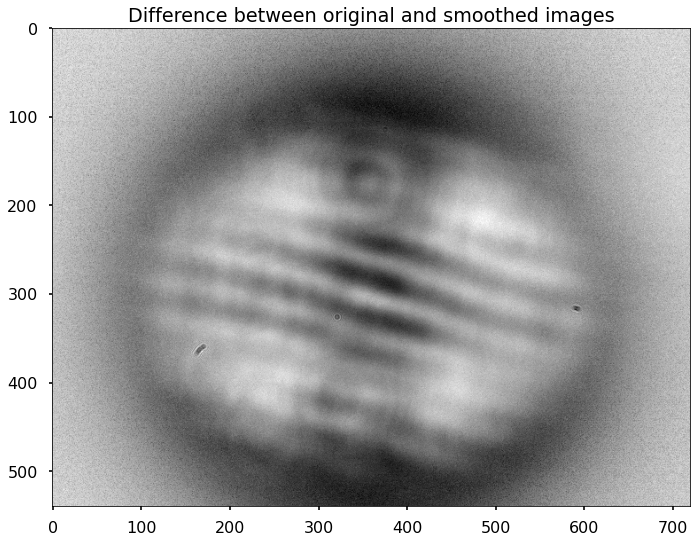

In [34]:
# img_diff = 128 + img_orig - img_fit
img_diff = img_orig - img_fit

print('min_diff = ', np.min(img_diff))
print('max_diff = ', np.max(img_diff))
    
with plt.style.context(('seaborn-poster')):
    fig = plt.figure()
    ax = fig.gca()
    ax.imshow(img_diff, cmap='gray', vmin=np.min(img_diff), vmax=np.max(img_diff))
    ax.set_title("Difference between original and smoothed images")

print('relative deviation (above) = ', 100.*(np.max(img_diff)/np.max(img_orig)), '%')
print('relative deviation (below) = ', 100.*(abs(np.min(img_diff))/np.max(img_orig)), '%')

In [35]:
print(' ')
print('*************************')
print('img_orig = ')
print(img_orig)
min_orig = np.min(img_orig)
max_orig = np.max(img_orig)
print(' ')
print('min original = ', min_orig)
print('max original = ', max_orig)

print(' ')
print('*************************')
print('img_fit = ')
print(img_fit)
min_fit = np.min(img_fit)
max_fit = np.max(img_fit)
print(' ')
print('min fitted = ', min_fit)
print('max fitted = ', max_fit)

print(' ')
print('*************************')
print('img_diff = ')
print(img_diff)
min_diff = np.min(img_diff)
max_diff = np.max(img_diff)
print(' ')
print('min diff = ', min_diff)
print('max diff = ', max_diff)

 
*************************
img_orig = 
[[15 17 12 ... 12 12 15]
 [12 15 15 ... 15 15 15]
 [15 12 15 ... 17 12 12]
 ...
 [12 15  9 ... 12 15 15]
 [15 15 15 ... 15 15 12]
 [15 15 15 ...  9 12 12]]
 
min original =  6
max original =  175
 
*************************
img_fit = 
[[0.90015309 0.91278962 0.92557463 ... 0.96154802 0.94834787 0.93529961]
 [0.91091694 0.92371046 0.93665439 ... 0.9730755  0.95971097 0.94650033]
 [0.92177882 0.93473084 0.94783524 ... 0.9847084  0.97117789 0.9578033 ]
 ...
 [2.06414851 2.09415478 2.12453231 ... 2.21010556 2.17868821 2.14765161]
 [2.04525755 2.07497667 2.10506326 ... 2.1898157  2.15869991 2.12796098]
 [2.02646621 2.05589983 2.08569716 ... 2.16963356 2.13881758 2.10837458]]
 
min fitted =  0.9001530862277853
max fitted =  166.34525487749525
 
*************************
img_diff = 
[[14.09984691 16.08721038 11.07442537 ... 11.03845198 11.05165213
  14.06470039]
 [11.08908306 14.07628954 14.06334561 ... 14.0269245  14.04028903
  14.05349967]
 [14.078221